In [156]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
imdb_raw = pd.read_csv('imdb_labelled.txt', delimiter='\t', quoting=3, header=None)
imdb_raw.columns = ['comment', 'positive']
imdb_raw.shape

(1000, 2)

In [158]:
imdb_raw['comment_length'] = imdb_raw['comment'].str.len()

In [159]:
pos = imdb_raw.groupby('positive')
pos.describe()

comment_length                                                   
                  count    mean        std  min   25%   50%     75%    max
positive                                                                  
0                 500.0  77.088  50.887753  8.0  40.0  65.0  104.00  321.0
1                 500.0  87.456  60.820773  7.0  42.0  72.0  115.25  479.0

In [160]:
# Feature 1: Long comments tend to be positive
imdb_raw['long'] = np.where(imdb_raw['comment_length'] > 115, 1, 0)
# Feature 2: Short Comments are negative
imdb_raw['short'] = np.where(imdb_raw['comment_length'] < 40, 0, 1)
imdb_raw.head(10)

,comment,positive,comment_length,long,short
0,"A very, very, very slow-moving, aimless movie ...",0,87,0,1
1,Not sure who was more lost - the flat characte...,0,99,0,1
2,Attempting artiness with black & white and cle...,0,188,1,1
3,Very little music or anything to speak of.,0,44,0,1
4,The best scene in the movie was when Gerardo i...,1,108,0,1
5,"The rest of the movie lacks art, charm, meanin...",0,114,0,1
6,Wasted two hours.,0,19,0,0
7,Saw the movie today and thought it was a good ...,1,79,0,1
8,A bit predictable.,0,20,0,0
9,Loved the casting of Jimmy Buffet as the scien...,1,59,0,1


In [161]:
positive_keywords = ['love', 'enjoyed', 'recommend', 'excellent', 'terrific', 'great']
negative_keywords = ['crap', 'cheap', 'horrible', 'waste', 'sucked', 'awful', 
                    'bad']

for neg_key in negative_keywords:
    imdb_raw[str(neg_key)] = imdb_raw.comment.str.contains(
        ' ' + str(neg_key) + ' ',
        case=False
    )
    
for pos_key in positive_keywords:
    imdb_raw[str(pos_key)] = imdb_raw.comment.str.contains(
        ' ' + str(pos_key) + ' ',
        case=False
    )

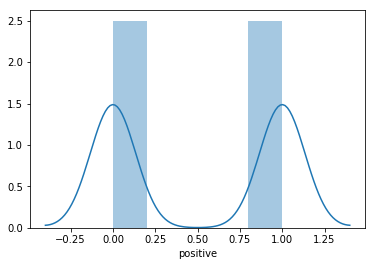

In [162]:
sns.distplot(imdb_raw['positive'])

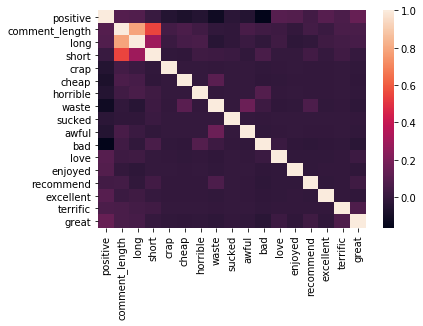

In [163]:
sns.heatmap(imdb_raw.corr())

In [164]:
data = imdb_raw[negative_keywords + positive_keywords]
target = imdb_raw['positive']

In [165]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print('Number of mismatched points of of the total {}: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
))


Number of mismatched points of of the total 1000: 438


In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[492,   8],
       [430,  70]])

In [167]:
tn, fp, fn, tp = confusion_matrix(target, y_pred).ravel()
print(tn, fp, fn, tp)

492 8 430 70


In [168]:
amazon_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', quoting=3, header=None)
amazon_raw.columns = ['comment', 'positive']
amazon_raw.shape

(1000, 2)

In [169]:
amazon_raw['comment_length'] = amazon_raw['comment'].str.len()

In [170]:
apos = amazon_raw.groupby('positive')
apos.describe()

comment_length                                                  
                  count    mean        std   min   25%   50%   75%    max
positive                                                                 
0                 500.0  56.824  34.022464  11.0  29.0  52.0  77.0  149.0
1                 500.0  53.628  35.234764  11.0  25.0  43.0  78.0  148.0

In [171]:
amazon_raw['long'] = np.where(amazon_raw['comment_length'] > 78, 1, 0)
amazon_raw['short'] = np.where(amazon_raw['comment_length'] < 29, 0, 1)
amazon_raw.head(10)

,comment,positive,comment_length,long,short
0,So there is no way for me to plug it in here i...,0,82,1,1
1,"Good case, Excellent value.",1,27,0,0
2,Great for the jawbone.,1,22,0,0
3,Tied to charger for conversations lasting more...,0,79,1,1
4,The mic is great.,1,17,0,0
5,I have to jiggle the plug to get it to line up...,0,74,0,1
6,If you have several dozen or several hundred c...,0,111,1,1
7,If you are Razr owner...you must have this!,1,43,0,1
8,"Needless to say, I wasted my money.",0,35,0,1
9,What a waste of money and time!.,0,32,0,1


In [172]:
for neg_key in negative_keywords:
    amazon_raw[str(neg_key)] = amazon_raw.comment.str.contains(
        ' ' + str(neg_key) + ' ',
        case=False
    )
    
for pos_key in positive_keywords:
    amazon_raw[str(pos_key)] = amazon_raw.comment.str.contains(
        ' ' + str(pos_key) + ' ',
        case=False
    )

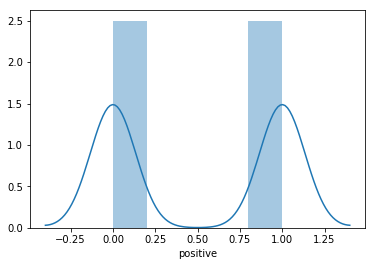

In [173]:
sns.distplot(amazon_raw['positive'])

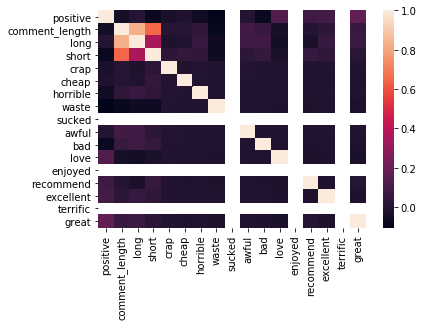

In [174]:
sns.heatmap(amazon_raw.corr())

In [175]:
amazon_data = amazon_raw[positive_keywords]
amazon_target = amazon_raw['positive']

In [176]:
from sklearn.naive_bayes import BernoulliNB

bnb.fit(amazon_data, amazon_target)

a_y_pred = bnb.predict(amazon_data)

print('Number of mismatched points out of the total {}: {}'.format(
    amazon_data.shape[0],
    (amazon_target != a_y_pred).sum()
))

Number of mismatched points out of the total 1000: 434


In [177]:
from sklearn.metrics import confusion_matrix
confusion_matrix(amazon_target, a_y_pred)

array([[493,   7],
       [427,  73]])

In [178]:
tn, fp, fn, tp = confusion_matrix(amazon_target, a_y_pred).ravel()
print('TN: {}, FP: {}, FN: {}, TP: {}'.format(tn, fp, fn, tp))

TN: 493, FP: 7, FN: 427, TP: 73


In [179]:
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(sensitivity)
print(specificity)

0.146
0.986


#### Do any of your classifiers seem to overfit? ####
No <br>
#### Which features seem to perform the best?  Why? ####
Both positive and negative comment keywords plus the short comment feature.  Both keywords plus both short and long were equally as effective but I chose the one with less features since that would probably be less resource intensive. <br>
#### Which features seemed to be most impactful to performance? ####
Just the positive comments on their own seemed to produce the fewest number of errors and led to us correctly deducing a negative comment > 98% of the time.

#### Errors for features built from imdb data used on amazon comments ####
Positive Comments Only: 434 (TN: 493, FP: 7, FN: 427, TP: 73) <br>
Negative Comments Only: 478 (TN: 24, FP: 476, FN: 2, TP: 498)<br>
Positive and Negative: 434 (TN: 493, FP: 7, FN: 427, TP: 73)<br>
Positive and Long: 434 (TN: 493, FP: 7, FN: 427, TP: 73)<br>
Positive and Short: 417 (TN: 369, FP: 131, FN: 286, TP: 214)<br>
Negative and Long: 478 (TN: 24, FP: 476, FN: 2, TP: 498)<br>
Negative and Short 459 (TN: 382, FP: 118, FN: 341, TP: 159)<br>
Both and Long: 434 (TN: 493, FP: 7, FN: 427, TP: 73)<br>
Both and Short: 411 (TN: 375, FP: 125, FN: 286, TP: 214)<br>
Both and Both: 411 (TN: 375, FP: 125, FN: 286, TP: 214)<br>
Short Only: 465 (TN: 376, FP: 124, FN: 341, TP: 159)<br>
Long Only: 495 (TN: 380, FP: 120, FN: 378, TP: 122)<br>
Short and Long: 465 (TN: 376, FP: 124, FN: 341, TP: 159)<br>